In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 6
fig_height = 4
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/Users/hirofumi48/162348.github.io/posts/2024/Kernels':
  os.chdir(r'/Users/hirofumi48/162348.github.io/posts/2024/Kernels')

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


{"/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.framework/Versions/3.12/lib/python3.12/importlib/_bootstrap.py": 1717698404.0, "/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.framework/Versions/3.12/lib/python3.12/importlib/_bootstrap_external.py": 1717698404.0, "/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.framework/Versions/3.12/lib/python3.12/zipimport.py": 1717698404.0, "/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.framework/Versions/3.12/lib/python3.12/codecs.py": 1717698404.0, "/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.framework/Versions/3.12/lib/python3.12/encodings/aliases.py": 1717698404.0, "/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.framework/Versions/3.12/lib/python3.12/encodings/__init__.py": 1717698404.0, "/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.framework/Versions/3.12/lib/python3.12/encodings/utf_8.py": 1717698404.0, "/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.

/var/folders/gx/6w78f6997l5___173r25fp3m0000gn/T/ipykernel_3234/2432452017.py:24: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


In [2]:
import torch
import torch.nn as nn

import numpy as np

from tqdm import tqdm
from torchvision.utils import save_image, make_grid

In [3]:
dataset_path = '~/hirofumi/datasets'

DEVICE = torch.device("mps")

batch_size = 100

x_dim = 784
hidden_dim = 400
latent_dim = 200

lr = 1e-3

epochs = 30

In [4]:
#| code-summary: データセットをダウンロードして読み込む
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torch.utils.data import DataLoader


mnist_transform = transforms.Compose([
        transforms.ToTensor(),
])

kwargs = {'num_workers': 0, 'pin_memory': True} 

train_dataset = MNIST(dataset_path, transform=mnist_transform, train=True, download=True)
test_dataset  = MNIST(dataset_path, transform=mnist_transform, train=False, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, **kwargs)
test_loader  = DataLoader(dataset=test_dataset,  batch_size=batch_size, shuffle=False, **kwargs)

In [5]:
import torch
print(torch.__version__)
print(torch.backends.mps.is_available())

2.4.0
True


In [6]:
class Encoder(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(Encoder, self).__init__()

        self.FC_input = nn.Linear(input_dim, hidden_dim)  # <1>
        self.FC_input2 = nn.Linear(hidden_dim, hidden_dim)
        self.FC_mean  = nn.Linear(hidden_dim, latent_dim)
        self.FC_var   = nn.Linear(hidden_dim, latent_dim)
        
        self.LeakyReLU = nn.LeakyReLU(0.2)
        
        self.training = True
        
    def forward(self, x):
        h_       = self.LeakyReLU(self.FC_input(x))
        h_       = self.LeakyReLU(self.FC_input2(h_))  # <2>
        mean     = self.FC_mean(h_)
        log_var  = self.FC_var(h_)                     #  <3>
        
        return mean, log_var

In [7]:
class Decoder(nn.Module):
    def __init__(self, latent_dim, hidden_dim, output_dim):
        super(Decoder, self).__init__()
        self.FC_hidden = nn.Linear(latent_dim, hidden_dim)
        self.FC_hidden2 = nn.Linear(hidden_dim, hidden_dim)
        self.FC_output = nn.Linear(hidden_dim, output_dim)
        
        self.LeakyReLU = nn.LeakyReLU(0.2)
        
    def forward(self, x):
        h     = self.LeakyReLU(self.FC_hidden(x))
        h     = self.LeakyReLU(self.FC_hidden2(h))
        
        x_hat = torch.sigmoid(self.FC_output(h))  # <1>
        return x_hat

In [8]:
class Model(nn.Module):
    def __init__(self, Encoder, Decoder):
        super(Model, self).__init__()
        self.Encoder = Encoder
        self.Decoder = Decoder
        
    def reparameterization(self, mean, var):
        epsilon = torch.randn_like(var).to(DEVICE)  # <1>  
        z = mean + var*epsilon   # <2>
        return z
        
                
    def forward(self, x):
        mean, log_var = self.Encoder(x)  # <3>
        z = self.reparameterization(mean, torch.exp(0.5 * log_var))  # <4>
        x_hat            = self.Decoder(z)  # <5>
        
        return x_hat, mean, log_var  # <6>

In [9]:
encoder = Encoder(input_dim=x_dim, hidden_dim=hidden_dim, latent_dim=latent_dim)
decoder = Decoder(latent_dim=latent_dim, hidden_dim = hidden_dim, output_dim = x_dim)

model = Model(Encoder=encoder, Decoder=decoder).to(DEVICE)  # <1>

In [10]:
from torch.optim import Adam

BCE_loss = nn.BCELoss()

def loss_function(x, x_hat, mean, log_var):
    reproduction_loss = nn.functional.binary_cross_entropy(x_hat, x, reduction='sum')
    KLD      = - 0.5 * torch.sum(1 + log_var - mean.pow(2) - log_var.exp())

    return reproduction_loss + KLD


optimizer = Adam(model.parameters(), lr=lr)

In [11]:
import time

print("Start training VAE...")
model.train()  # <1>

start_time = time.time()

for epoch in range(epochs):
    overall_loss = 0
    for batch_idx, (x, _) in enumerate(train_loader):
        x = x.view(batch_size, x_dim)  # <2>
        x = x.to(DEVICE)  # <3>

        optimizer.zero_grad()  # <4>

        x_hat, mean, log_var = model(x)
        loss = loss_function(x, x_hat, mean, log_var)
        
        overall_loss += loss.item()
        
        loss.backward()
        optimizer.step()
        
    print("\tEpoch", epoch + 1, "complete!", "\tAverage Loss: ", overall_loss / (batch_idx*batch_size))

total_time = time.time() - start_time
print("Finish!! Total time: ", total_time)

Start training VAE...


	Epoch 1 complete! 	Average Loss:  175.36252209085455


	Epoch 2 complete! 	Average Loss:  129.14958457781196


	Epoch 3 complete! 	Average Loss:  117.65271259390651


	Epoch 4 complete! 	Average Loss:  113.45947293340463


	Epoch 5 complete! 	Average Loss:  110.7511647178892


	Epoch 6 complete! 	Average Loss:  108.6976742324447


	Epoch 7 complete! 	Average Loss:  107.31498443043093


	Epoch 8 complete! 	Average Loss:  106.26178927770242


	Epoch 9 complete! 	Average Loss:  105.46850864722454


	Epoch 10 complete! 	Average Loss:  104.81860570025563


	Epoch 11 complete! 	Average Loss:  104.25153936573977


	Epoch 12 complete! 	Average Loss:  103.755021438726


	Epoch 13 complete! 	Average Loss:  103.36037327838064


	Epoch 14 complete! 	Average Loss:  103.0021041253652


	Epoch 15 complete! 	Average Loss:  102.73543854014504


	Epoch 16 complete! 	Average Loss:  102.37967328359767


	Epoch 17 complete! 	Average Loss:  102.22292182935101


	Epoch 18 complete! 	Average Loss:  101.97767369443865


	Epoch 19 complete! 	Average Loss:  101.75506798440108


	Epoch 20 complete! 	Average Loss:  101.55393588924248


	Epoch 21 complete! 	Average Loss:  101.39337562930405


	Epoch 22 complete! 	Average Loss:  101.25349332220367


	Epoch 23 complete! 	Average Loss:  101.01709069151711


	Epoch 24 complete! 	Average Loss:  100.97026566086707


	Epoch 25 complete! 	Average Loss:  100.7724350969063


	Epoch 26 complete! 	Average Loss:  100.70291000952108


	Epoch 27 complete! 	Average Loss:  100.5600941999687


	Epoch 28 complete! 	Average Loss:  100.46706979079717


	Epoch 29 complete! 	Average Loss:  100.34214339980697


	Epoch 30 complete! 	Average Loss:  100.27846345471619
Finish!! Total time:  129.9700391292572


In [12]:
model.eval()

with torch.no_grad():  # <1>
    for batch_idx, (x, _) in enumerate(tqdm(test_loader)):
        x = x.view(batch_size, x_dim)
        x = x.to(DEVICE)
        
        x_hat, _, _ = model(x)


        break

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

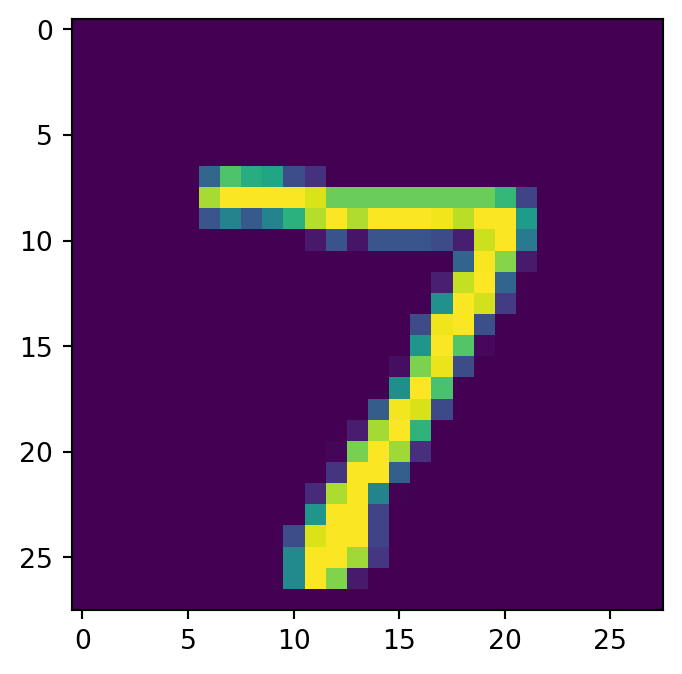

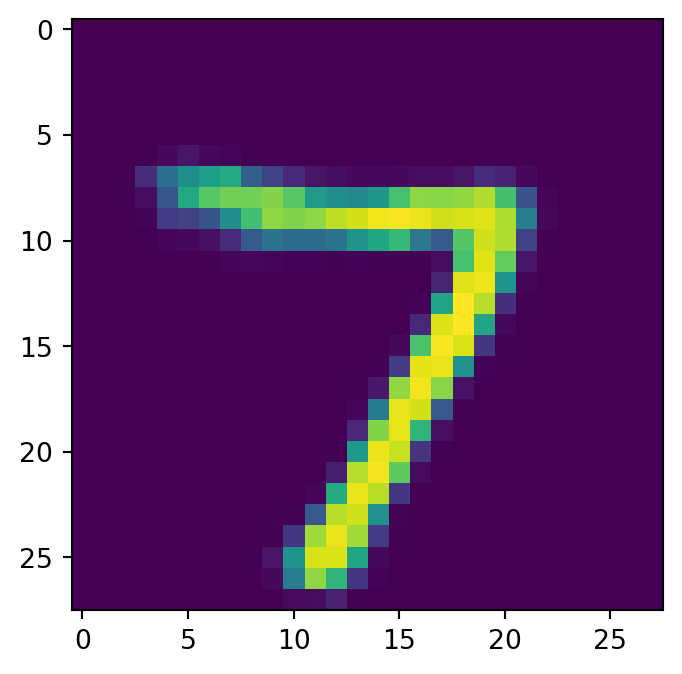

In [13]:
#| layout-ncol: 2
#| label: fig-reconstruction
import matplotlib.pyplot as plt

def show_image(x, idx):
    x = x.view(batch_size, 28, 28)

    fig = plt.figure()
    plt.imshow(x[idx].cpu().numpy())

show_image(x, idx=0)
show_image(x_hat, idx=0)

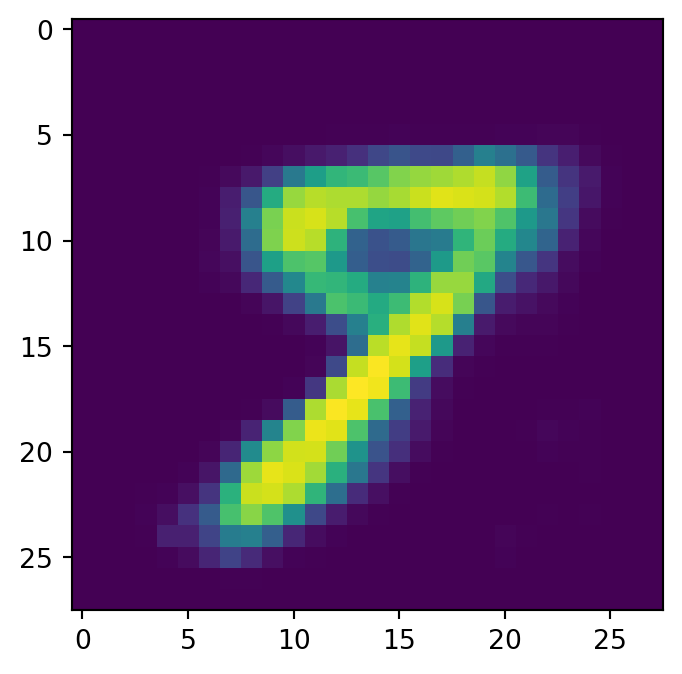

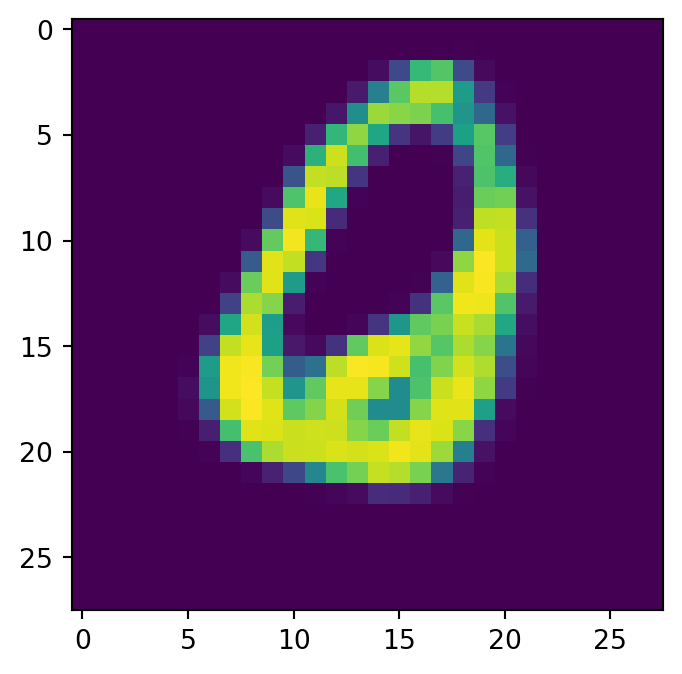

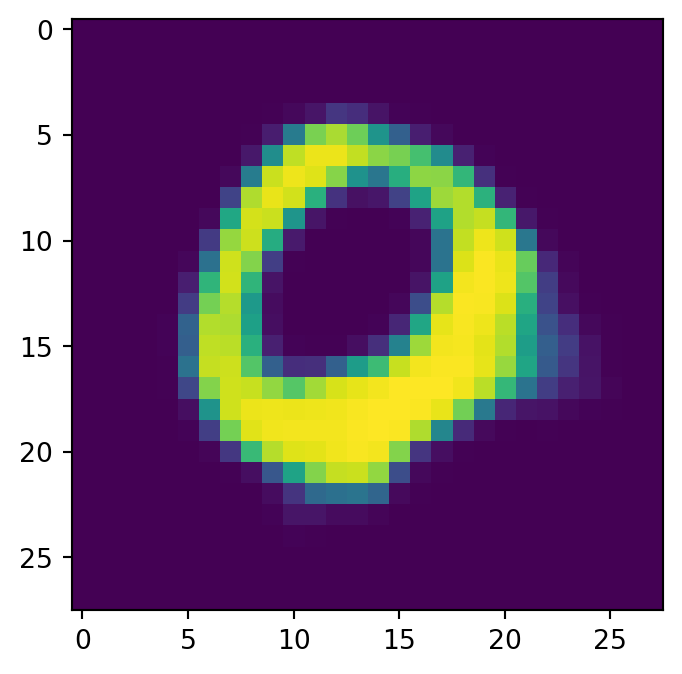

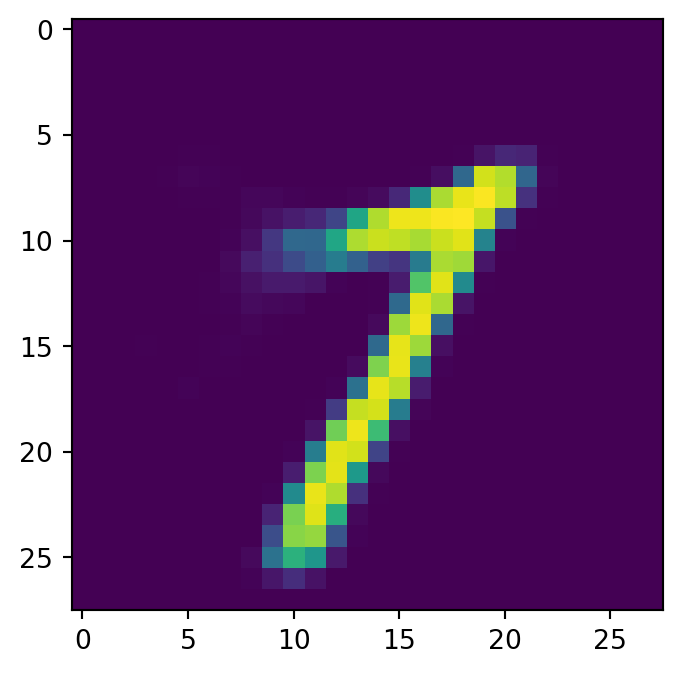

In [14]:
#| layout-ncol: 2
#| layout-nrow: 2
#| label: fig-generation
with torch.no_grad():
    noise = torch.randn(batch_size, latent_dim).to(DEVICE)
    generated_images = decoder(noise)

save_image(generated_images.view(batch_size, 1, 28, 28), 'generated_sample.png')
for i in range(4):
    show_image(generated_images, idx=i)

In [15]:
DEVICE = torch.device("mps")

batch_size = 128
img_size = (32, 32)

input_dim = 3
hidden_dim = 512
latent_dim = 16
n_embeddings= 512
output_dim = 3
commitment_beta = 0.25

lr = 2e-4

epochs = 50

print_step = 50

In [16]:
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms
from torch.utils.data import DataLoader


mnist_transform = transforms.Compose([
        transforms.ToTensor(),
])

kwargs = {'num_workers': 1, 'pin_memory': True} 

train_dataset = CIFAR10(dataset_path, transform=mnist_transform, train=True, download=True)
test_dataset  = CIFAR10(dataset_path, transform=mnist_transform, train=False, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, **kwargs)
test_loader  = DataLoader(dataset=test_dataset,  batch_size=batch_size, shuffle=False,  **kwargs)

  0%|          | 0/170498071 [00:00<?, ?it/s]

  0%|          | 32768/170498071 [00:00<14:49, 191623.59it/s]

  0%|          | 65536/170498071 [00:00<14:42, 193018.56it/s]

  0%|          | 98304/170498071 [00:00<14:33, 195127.44it/s]

  0%|          | 229376/170498071 [00:00<06:42, 422557.54it/s]

  0%|          | 360448/170498071 [00:00<05:11, 545362.45it/s]

  0%|          | 720896/170498071 [00:01<02:38, 1074009.10it/s]

  1%|          | 1212416/170498071 [00:01<01:43, 1636624.16it/s]

  1%|          | 1900544/170498071 [00:01<01:39, 1699659.02it/s]

  1%|▏         | 2359296/170498071 [00:01<01:27, 1930286.27it/s]

  2%|▏         | 3080192/170498071 [00:01<01:07, 2491143.12it/s]

  2%|▏         | 3407872/170498071 [00:02<01:10, 2356931.50it/s]

  2%|▏         | 3768320/170498071 [00:02<01:13, 2281554.55it/s]

  2%|▏         | 4128768/170498071 [00:02<01:14, 2233632.08it/s]

  3%|▎         | 4521984/170498071 [00:02<01:13, 2246254.02it/s]

  3%|▎         | 4882432/170498071 [00:02<01:14, 2218315.85it/s]

  3%|▎         | 5275648/170498071 [00:02<01:13, 2241772.26it/s]

  3%|▎         | 5668864/170498071 [00:03<01:13, 2245866.51it/s]

  4%|▎         | 6062080/170498071 [00:03<01:12, 2267121.70it/s]

  4%|▍         | 6455296/170498071 [00:03<01:12, 2273558.89it/s]

  4%|▍         | 6848512/170498071 [00:03<01:12, 2270113.97it/s]

  4%|▍         | 7176192/170498071 [00:03<01:06, 2459558.64it/s]

  4%|▍         | 7438336/170498071 [00:03<01:12, 2248855.81it/s]

  5%|▍         | 7766016/170498071 [00:04<01:06, 2462892.44it/s]

  5%|▍         | 8060928/170498071 [00:04<01:02, 2578708.93it/s]

  5%|▍         | 8355840/170498071 [00:04<01:09, 2326172.37it/s]

  5%|▌         | 8617984/170498071 [00:04<01:09, 2331998.18it/s]

  5%|▌         | 8945664/170498071 [00:04<01:06, 2428505.56it/s]

  5%|▌         | 9207808/170498071 [00:04<01:06, 2432062.92it/s]

  6%|▌         | 9469952/170498071 [00:04<01:07, 2392038.98it/s]

  6%|▌         | 9764864/170498071 [00:04<01:05, 2442558.88it/s]

  6%|▌         | 10027008/170498071 [00:04<01:08, 2334444.41it/s]

  6%|▌         | 10289152/170498071 [00:05<01:09, 2316417.26it/s]

  6%|▌         | 10616832/170498071 [00:05<01:02, 2551834.06it/s]

  6%|▋         | 10878976/170498071 [00:05<01:06, 2389105.30it/s]

  7%|▋         | 11173888/170498071 [00:05<01:05, 2437405.93it/s]

  7%|▋         | 11501568/170498071 [00:05<01:00, 2626282.53it/s]

  7%|▋         | 11796480/170498071 [00:05<01:04, 2468508.75it/s]

  7%|▋         | 12058624/170498071 [00:05<01:03, 2481743.09it/s]

  7%|▋         | 12353536/170498071 [00:05<01:01, 2588997.19it/s]

  7%|▋         | 12615680/170498071 [00:06<01:06, 2387813.83it/s]

  8%|▊         | 12877824/170498071 [00:06<01:05, 2394626.54it/s]

  8%|▊         | 13238272/170498071 [00:06<01:02, 2529705.77it/s]

  8%|▊         | 13500416/170498071 [00:06<01:04, 2446001.42it/s]

  8%|▊         | 13762560/170498071 [00:06<01:03, 2472887.49it/s]

  8%|▊         | 14090240/170498071 [00:06<01:04, 2411630.73it/s]

  8%|▊         | 14385152/170498071 [00:06<01:05, 2397501.40it/s]

  9%|▊         | 14680064/170498071 [00:06<01:01, 2531404.46it/s]

  9%|▉         | 14942208/170498071 [00:06<01:01, 2512307.06it/s]

  9%|▉         | 15204352/170498071 [00:07<01:02, 2494952.47it/s]

  9%|▉         | 15466496/170498071 [00:07<01:02, 2484274.40it/s]

  9%|▉         | 15728640/170498071 [00:07<01:04, 2409858.06it/s]

  9%|▉         | 16056320/170498071 [00:07<01:01, 2524217.79it/s]

 10%|▉         | 16318464/170498071 [00:07<01:00, 2533264.88it/s]

 10%|▉         | 16580608/170498071 [00:07<01:04, 2385864.85it/s]

 10%|▉         | 16875520/170498071 [00:07<01:02, 2460944.96it/s]

 10%|█         | 17170432/170498071 [00:07<00:59, 2580775.00it/s]

 10%|█         | 17432576/170498071 [00:07<01:05, 2320490.35it/s]

 10%|█         | 17727488/170498071 [00:08<01:02, 2459916.39it/s]

 11%|█         | 18055168/170498071 [00:08<00:56, 2675570.57it/s]

 11%|█         | 18350080/170498071 [00:08<01:02, 2434498.96it/s]

 11%|█         | 18612224/170498071 [00:08<01:02, 2414135.62it/s]

 11%|█         | 18939904/170498071 [00:08<00:58, 2611515.32it/s]

 11%|█▏        | 19234816/170498071 [00:08<01:00, 2496458.61it/s]

 11%|█▏        | 19496960/170498071 [00:08<01:02, 2413151.05it/s]

 12%|█▏        | 19824640/170498071 [00:08<00:57, 2609291.94it/s]

 12%|█▏        | 20119552/170498071 [00:09<01:01, 2428737.04it/s]

 12%|█▏        | 20414464/170498071 [00:09<00:58, 2551727.18it/s]

 12%|█▏        | 20676608/170498071 [00:09<00:59, 2501267.62it/s]

 12%|█▏        | 20938752/170498071 [00:09<00:59, 2502489.15it/s]

 12%|█▏        | 21200896/170498071 [00:09<01:03, 2361008.74it/s]

 13%|█▎        | 21463040/170498071 [00:09<01:05, 2281011.83it/s]

 13%|█▎        | 21856256/170498071 [00:09<01:03, 2323333.62it/s]

 13%|█▎        | 22216704/170498071 [00:09<00:56, 2624390.27it/s]

 13%|█▎        | 22511616/170498071 [00:09<00:59, 2497518.73it/s]

 13%|█▎        | 22773760/170498071 [00:10<00:59, 2465656.20it/s]

 14%|█▎        | 23101440/170498071 [00:10<00:55, 2663422.84it/s]

 14%|█▎        | 23396352/170498071 [00:10<00:58, 2530971.33it/s]

 14%|█▍        | 23658496/170498071 [00:10<00:58, 2514085.73it/s]

 14%|█▍        | 24018944/170498071 [00:10<00:53, 2756946.59it/s]

 14%|█▍        | 24313856/170498071 [00:10<00:57, 2552800.90it/s]

 14%|█▍        | 24608768/170498071 [00:10<01:00, 2409601.72it/s]

 15%|█▍        | 25001984/170498071 [00:10<00:52, 2748886.58it/s]

 15%|█▍        | 25296896/170498071 [00:11<00:52, 2745262.03it/s]

 15%|█▌        | 25591808/170498071 [00:11<00:57, 2528471.01it/s]

 15%|█▌        | 25952256/170498071 [00:11<00:52, 2747399.70it/s]

 15%|█▌        | 26279936/170498071 [00:11<00:52, 2736036.49it/s]

 16%|█▌        | 26574848/170498071 [00:11<00:54, 2635224.09it/s]

 16%|█▌        | 26935296/170498071 [00:11<00:49, 2871744.74it/s]

 16%|█▌        | 27230208/170498071 [00:11<00:51, 2802702.13it/s]

 16%|█▌        | 27525120/170498071 [00:11<00:56, 2525218.24it/s]

 16%|█▋        | 27951104/170498071 [00:12<00:50, 2796770.26it/s]

 17%|█▋        | 28278784/170498071 [00:12<00:49, 2860098.67it/s]

 17%|█▋        | 28573696/170498071 [00:12<00:53, 2651501.82it/s]

 17%|█▋        | 28966912/170498071 [00:12<00:47, 2975633.82it/s]

 17%|█▋        | 29294592/170498071 [00:12<00:46, 3014151.89it/s]

 17%|█▋        | 29622272/170498071 [00:12<00:50, 2775331.02it/s]

 18%|█▊        | 30015488/170498071 [00:12<00:45, 3060160.89it/s]

 18%|█▊        | 30375936/170498071 [00:12<00:48, 2882232.73it/s]

 18%|█▊        | 30703616/170498071 [00:12<00:47, 2970199.00it/s]

 18%|█▊        | 31129600/170498071 [00:13<00:44, 3152709.37it/s]

 18%|█▊        | 31457280/170498071 [00:13<00:46, 2995528.55it/s]

 19%|█▊        | 31817728/170498071 [00:13<00:44, 3128883.56it/s]

 19%|█▉        | 32243712/170498071 [00:13<00:41, 3348427.78it/s]

 19%|█▉        | 32604160/170498071 [00:13<00:45, 3027001.47it/s]

 19%|█▉        | 33062912/170498071 [00:13<00:41, 3345974.87it/s]

 20%|█▉        | 33456128/170498071 [00:13<00:41, 3326081.17it/s]

 20%|█▉        | 33816576/170498071 [00:13<00:42, 3189607.18it/s]

 20%|██        | 34275328/170498071 [00:14<00:38, 3502460.73it/s]

 20%|██        | 34668544/170498071 [00:14<00:38, 3534854.66it/s]

 21%|██        | 35028992/170498071 [00:14<00:40, 3385989.98it/s]

 21%|██        | 35520512/170498071 [00:14<00:37, 3645872.34it/s]

 21%|██        | 35913728/170498071 [00:14<00:36, 3641408.88it/s]

 21%|██▏       | 36339712/170498071 [00:14<00:36, 3657707.52it/s]

 22%|██▏       | 36831232/170498071 [00:14<00:35, 3779897.02it/s]

 22%|██▏       | 37224448/170498071 [00:14<00:35, 3714381.75it/s]

 22%|██▏       | 37683200/170498071 [00:14<00:34, 3879787.38it/s]

 22%|██▏       | 38240256/170498071 [00:15<00:34, 3786617.22it/s]

 23%|██▎       | 38731776/170498071 [00:15<00:32, 4018102.49it/s]

 23%|██▎       | 39190528/170498071 [00:15<00:33, 3953585.22it/s]

 23%|██▎       | 39714816/170498071 [00:15<00:32, 4080726.42it/s]

 24%|██▎       | 40173568/170498071 [00:15<00:31, 4162042.09it/s]

 24%|██▍       | 40697856/170498071 [00:15<00:31, 4170487.59it/s]

 24%|██▍       | 41254912/170498071 [00:15<00:29, 4347485.52it/s]

 24%|██▍       | 41746432/170498071 [00:15<00:29, 4433633.06it/s]

 25%|██▍       | 42303488/170498071 [00:15<00:27, 4700229.30it/s]

 25%|██▌       | 42795008/170498071 [00:16<00:28, 4546875.19it/s]

 25%|██▌       | 43319296/170498071 [00:16<00:26, 4733476.70it/s]

 26%|██▌       | 43810816/170498071 [00:16<00:26, 4746827.05it/s]

 26%|██▌       | 44367872/170498071 [00:16<00:27, 4615776.19it/s]

 26%|██▋       | 44924928/170498071 [00:16<00:26, 4739958.25it/s]

 27%|██▋       | 45514752/170498071 [00:16<00:24, 5055079.47it/s]

 27%|██▋       | 46104576/170498071 [00:16<00:24, 5148509.73it/s]

 27%|██▋       | 46727168/170498071 [00:16<00:22, 5447435.16it/s]

 28%|██▊       | 47284224/170498071 [00:16<00:24, 4948806.87it/s]

 28%|██▊       | 47808512/170498071 [00:17<00:24, 4921550.77it/s]

 29%|██▊       | 48594944/170498071 [00:17<00:21, 5686136.37it/s]

 29%|██▉       | 49184768/170498071 [00:17<00:21, 5552185.63it/s]

 29%|██▉       | 49807360/170498071 [00:17<00:22, 5349844.17it/s]

 30%|██▉       | 50528256/170498071 [00:17<00:20, 5789829.01it/s]

 30%|██▉       | 51118080/170498071 [00:17<00:20, 5740855.23it/s]

 30%|███       | 51904512/170498071 [00:17<00:18, 6306669.85it/s]

 31%|███       | 52559872/170498071 [00:17<00:19, 6088286.51it/s]

 31%|███       | 53182464/170498071 [00:18<00:39, 3003204.00it/s]

 32%|███▏      | 55246848/170498071 [00:18<00:20, 5577586.81it/s]

 33%|███▎      | 56066048/170498071 [00:18<00:24, 4713449.14it/s]

 33%|███▎      | 56721408/170498071 [00:18<00:24, 4628625.42it/s]

 34%|███▎      | 57311232/170498071 [00:19<00:26, 4318574.75it/s]

 34%|███▍      | 57835520/170498071 [00:19<00:27, 4107966.94it/s]

 34%|███▍      | 58327040/170498071 [00:19<00:27, 4107434.36it/s]

 34%|███▍      | 58785792/170498071 [00:19<00:28, 3968202.14it/s]

 35%|███▍      | 59211776/170498071 [00:19<00:29, 3804581.87it/s]

 35%|███▍      | 59637760/170498071 [00:19<00:29, 3734301.65it/s]

 35%|███▌      | 60030976/170498071 [00:19<00:29, 3716431.56it/s]

 35%|███▌      | 60424192/170498071 [00:19<00:30, 3644013.05it/s]

 36%|███▌      | 60882944/170498071 [00:20<00:28, 3788781.69it/s]

 36%|███▌      | 61276160/170498071 [00:20<00:30, 3634050.91it/s]

 36%|███▌      | 61669376/170498071 [00:20<00:30, 3527835.45it/s]

 36%|███▋      | 62193664/170498071 [00:20<00:27, 3879806.27it/s]

 37%|███▋      | 62586880/170498071 [00:20<00:28, 3836788.30it/s]

 37%|███▋      | 62980096/170498071 [00:20<00:29, 3661112.09it/s]

 37%|███▋      | 63504384/170498071 [00:20<00:26, 4032345.52it/s]

 37%|███▋      | 63930368/170498071 [00:20<00:32, 3282776.93it/s]

 38%|███▊      | 64454656/170498071 [00:20<00:28, 3732595.30it/s]

 38%|███▊      | 64880640/170498071 [00:21<00:27, 3772846.25it/s]

 38%|███▊      | 65306624/170498071 [00:21<00:30, 3463303.60it/s]

 39%|███▊      | 65896448/170498071 [00:21<00:25, 4047668.60it/s]

 39%|███▉      | 66355200/170498071 [00:21<00:25, 4029928.59it/s]

 39%|███▉      | 66781184/170498071 [00:21<00:28, 3640342.15it/s]

 39%|███▉      | 67338240/170498071 [00:21<00:29, 3536398.12it/s]

 40%|███▉      | 68026368/170498071 [00:21<00:26, 3887206.43it/s]

 40%|████      | 68550656/170498071 [00:22<00:24, 4193551.76it/s]

 40%|████      | 69009408/170498071 [00:22<00:26, 3784318.93it/s]

 41%|████      | 69468160/170498071 [00:22<00:26, 3849309.12it/s]

 41%|████      | 69959680/170498071 [00:22<00:24, 4079773.61it/s]

 41%|████▏     | 70385664/170498071 [00:22<00:25, 4000140.59it/s]

 42%|████▏     | 70877184/170498071 [00:22<00:24, 4045628.45it/s]

 42%|████▏     | 71303168/170498071 [00:22<00:24, 4085518.27it/s]

 42%|████▏     | 71729152/170498071 [00:22<00:24, 3970198.76it/s]

 42%|████▏     | 72155136/170498071 [00:22<00:25, 3895700.47it/s]

 43%|████▎     | 72548352/170498071 [00:23<00:31, 3083643.02it/s]

 43%|████▎     | 73138176/170498071 [00:23<00:28, 3379457.95it/s]

 43%|████▎     | 73629696/170498071 [00:23<00:29, 3292703.78it/s]

 43%|████▎     | 74153984/170498071 [00:23<00:30, 3127523.79it/s]

 44%|████▍     | 74678272/170498071 [00:23<00:31, 3042981.53it/s]

 44%|████▍     | 75169792/170498071 [00:23<00:27, 3427494.93it/s]

 44%|████▍     | 75563008/170498071 [00:24<00:30, 3135169.88it/s]

 45%|████▍     | 75923456/170498071 [00:24<00:29, 3161415.76it/s]

 45%|████▍     | 76283904/170498071 [00:24<00:32, 2900156.98it/s]

 45%|████▌     | 76808192/170498071 [00:24<00:27, 3436104.46it/s]

 45%|████▌     | 77201408/170498071 [00:24<00:28, 3302421.85it/s]

 45%|████▌     | 77561856/170498071 [00:24<00:29, 3120396.06it/s]

 46%|████▌     | 77955072/170498071 [00:24<00:30, 3073461.55it/s]

 46%|████▌     | 78381056/170498071 [00:24<00:28, 3281716.15it/s]

 46%|████▌     | 78741504/170498071 [00:25<00:29, 3090028.78it/s]

 46%|████▋     | 79134720/170498071 [00:25<00:30, 3001755.80it/s]

 47%|████▋     | 79691776/170498071 [00:25<00:28, 3216315.91it/s]

 47%|████▋     | 80019456/170498071 [00:25<00:41, 2201381.38it/s]

 47%|████▋     | 80445440/170498071 [00:25<00:34, 2586749.20it/s]

 47%|████▋     | 80773120/170498071 [00:26<00:59, 1496031.88it/s]

 48%|████▊     | 81100800/170498071 [00:26<00:55, 1605251.18it/s]

 48%|████▊     | 81395712/170498071 [00:26<00:54, 1624896.43it/s]

 48%|████▊     | 81690624/170498071 [00:26<00:54, 1630210.30it/s]

 48%|████▊     | 81985536/170498071 [00:26<00:53, 1653603.06it/s]

 48%|████▊     | 82280448/170498071 [00:27<00:49, 1774822.51it/s]

 48%|████▊     | 82608128/170498071 [00:27<00:52, 1667066.07it/s]

 49%|████▊     | 82935808/170498071 [00:27<00:50, 1733002.14it/s]

 49%|████▉     | 83263488/170498071 [00:27<00:48, 1787624.55it/s]

 49%|████▉     | 83591168/170498071 [00:27<00:47, 1832367.80it/s]

 49%|████▉     | 83918848/170498071 [00:28<00:46, 1865314.00it/s]

 49%|████▉     | 84246528/170498071 [00:28<00:45, 1894615.27it/s]

 50%|████▉     | 84574208/170498071 [00:28<00:44, 1912321.40it/s]

 50%|████▉     | 84901888/170498071 [00:28<00:40, 2112476.71it/s]

 50%|████▉     | 85131264/170498071 [00:28<00:41, 2059467.75it/s]

 50%|█████     | 85360640/170498071 [00:28<00:44, 1918494.08it/s]

 50%|█████     | 85622784/170498071 [00:28<00:45, 1861719.68it/s]

 50%|█████     | 85950464/170498071 [00:29<00:42, 1985951.36it/s]

 51%|█████     | 86278144/170498071 [00:29<00:40, 2102895.97it/s]

 51%|█████     | 86507520/170498071 [00:29<00:40, 2081286.88it/s]

 51%|█████     | 86736896/170498071 [00:29<00:43, 1921653.76it/s]

 51%|█████     | 86999040/170498071 [00:29<00:43, 1903226.72it/s]

 51%|█████     | 87326720/170498071 [00:29<00:40, 2067215.80it/s]

 51%|█████▏    | 87588864/170498071 [00:29<00:38, 2174961.16it/s]

 52%|█████▏    | 87818240/170498071 [00:29<00:42, 1955465.68it/s]

 52%|█████▏    | 88047616/170498071 [00:30<00:42, 1925643.32it/s]

 52%|█████▏    | 88375296/170498071 [00:30<00:39, 2086827.72it/s]

 52%|█████▏    | 88604672/170498071 [00:30<00:39, 2098393.53it/s]

 52%|█████▏    | 88834048/170498071 [00:30<00:43, 1881308.81it/s]

 52%|█████▏    | 89096192/170498071 [00:30<00:40, 1986770.32it/s]

 52%|█████▏    | 89358336/170498071 [00:30<00:38, 2132216.27it/s]

 53%|█████▎    | 89587712/170498071 [00:30<00:40, 1991875.32it/s]

 53%|█████▎    | 89817088/170498071 [00:30<00:41, 1953742.02it/s]

 53%|█████▎    | 90112000/170498071 [00:31<00:38, 2070920.09it/s]

 53%|█████▎    | 90341376/170498071 [00:31<00:38, 2060808.62it/s]

 53%|█████▎    | 90570752/170498071 [00:31<00:40, 1966966.07it/s]

 53%|█████▎    | 90832896/170498071 [00:31<00:39, 2026413.51it/s]

 53%|█████▎    | 91095040/170498071 [00:31<00:37, 2128046.09it/s]

 54%|█████▎    | 91324416/170498071 [00:31<00:40, 1940176.05it/s]

 54%|█████▎    | 91586560/170498071 [00:31<00:41, 1901927.45it/s]

 54%|█████▍    | 91881472/170498071 [00:31<00:37, 2076229.06it/s]

 54%|█████▍    | 92110848/170498071 [00:32<00:39, 2009786.20it/s]

 54%|█████▍    | 92340224/170498071 [00:32<00:39, 1987949.29it/s]

 54%|█████▍    | 92602368/170498071 [00:32<00:36, 2111832.14it/s]

 54%|█████▍    | 92831744/170498071 [00:32<00:38, 2006463.05it/s]

 55%|█████▍    | 93061120/170498071 [00:32<00:39, 1961596.73it/s]

 55%|█████▍    | 93323264/170498071 [00:32<00:39, 1954350.47it/s]

 55%|█████▍    | 93552640/170498071 [00:32<00:37, 2031191.57it/s]

 55%|█████▌    | 93782016/170498071 [00:32<00:39, 1956169.93it/s]

 55%|█████▌    | 94011392/170498071 [00:33<00:37, 2033536.30it/s]

 55%|█████▌    | 94240768/170498071 [00:33<00:37, 2032265.79it/s]

 55%|█████▌    | 94470144/170498071 [00:33<00:38, 1972213.72it/s]

 56%|█████▌    | 94732288/170498071 [00:33<00:36, 2058383.10it/s]

 56%|█████▌    | 94961664/170498071 [00:33<00:36, 2070920.41it/s]

 56%|█████▌    | 95191040/170498071 [00:33<00:37, 2013066.00it/s]

 56%|█████▌    | 95453184/170498071 [00:33<00:36, 2068119.22it/s]

 56%|█████▌    | 95682560/170498071 [00:33<00:35, 2083547.26it/s]

 56%|█████▋    | 95911936/170498071 [00:33<00:36, 2057681.12it/s]

 56%|█████▋    | 96174080/170498071 [00:34<00:35, 2089206.52it/s]

 57%|█████▋    | 96403456/170498071 [00:34<00:34, 2123016.87it/s]

 57%|█████▋    | 96632832/170498071 [00:34<00:35, 2086904.47it/s]

 57%|█████▋    | 96894976/170498071 [00:34<00:35, 2090709.29it/s]

 57%|█████▋    | 97157120/170498071 [00:34<00:33, 2177051.11it/s]

 57%|█████▋    | 97386496/170498071 [00:34<00:34, 2140838.09it/s]

 57%|█████▋    | 97648640/170498071 [00:34<00:34, 2120534.67it/s]

 57%|█████▋    | 97910784/170498071 [00:34<00:33, 2184616.14it/s]

 58%|█████▊    | 98140160/170498071 [00:34<00:33, 2143449.30it/s]

 58%|█████▊    | 98369536/170498071 [00:35<00:33, 2125758.82it/s]

 58%|█████▊    | 98631680/170498071 [00:35<00:31, 2252204.02it/s]

 58%|█████▊    | 98861056/170498071 [00:35<00:32, 2175246.93it/s]

 58%|█████▊    | 99123200/170498071 [00:35<00:33, 2143921.49it/s]

 58%|█████▊    | 99418112/170498071 [00:35<00:30, 2317479.78it/s]

 58%|█████▊    | 99680256/170498071 [00:35<00:31, 2276822.26it/s]

 59%|█████▊    | 99942400/170498071 [00:35<00:34, 2049621.73it/s]

 59%|█████▉    | 100237312/170498071 [00:35<00:31, 2210637.05it/s]

 59%|█████▉    | 100499456/170498071 [00:36<00:30, 2293805.44it/s]

 59%|█████▉    | 100761600/170498071 [00:36<00:31, 2219287.25it/s]

 59%|█████▉    | 101056512/170498071 [00:36<00:29, 2385767.28it/s]

 59%|█████▉    | 101318656/170498071 [00:36<00:28, 2394371.52it/s]

 60%|█████▉    | 101613568/170498071 [00:36<00:27, 2514412.74it/s]

 60%|█████▉    | 101875712/170498071 [00:36<00:27, 2475883.14it/s]

 60%|█████▉    | 102137856/170498071 [00:36<00:28, 2431567.49it/s]

 60%|██████    | 102432768/170498071 [00:36<00:26, 2532487.16it/s]

 60%|██████    | 102694912/170498071 [00:36<00:28, 2364466.36it/s]

 60%|██████    | 103055360/170498071 [00:37<00:25, 2678292.64it/s]

 61%|██████    | 103350272/170498071 [00:37<00:26, 2563784.53it/s]

 61%|██████    | 103612416/170498071 [00:37<00:26, 2524021.82it/s]

 61%|██████    | 104005632/170498071 [00:37<00:23, 2866997.89it/s]

 61%|██████    | 104300544/170498071 [00:37<00:24, 2733336.16it/s]

 61%|██████▏   | 104595456/170498071 [00:37<00:24, 2639477.56it/s]

 62%|██████▏   | 104988672/170498071 [00:37<00:22, 2944120.01it/s]

 62%|██████▏   | 105316352/170498071 [00:37<00:22, 2929416.05it/s]

 62%|██████▏   | 105644032/170498071 [00:37<00:23, 2763266.06it/s]

 62%|██████▏   | 106070016/170498071 [00:38<00:20, 3108479.83it/s]

 62%|██████▏   | 106397696/170498071 [00:38<00:20, 3120192.21it/s]

 63%|██████▎   | 106725376/170498071 [00:38<00:21, 2928768.08it/s]

 63%|██████▎   | 107184128/170498071 [00:38<00:19, 3216869.59it/s]

 63%|██████▎   | 107544576/170498071 [00:38<00:19, 3244364.22it/s]

 63%|██████▎   | 107872256/170498071 [00:38<00:19, 3252262.18it/s]

 63%|██████▎   | 108232704/170498071 [00:38<00:18, 3347000.24it/s]

 64%|██████▎   | 108593152/170498071 [00:38<00:18, 3303317.43it/s]

 64%|██████▍   | 108986368/170498071 [00:38<00:17, 3435329.23it/s]

 64%|██████▍   | 109379584/170498071 [00:39<00:18, 3326454.69it/s]

 64%|██████▍   | 109805568/170498071 [00:39<00:17, 3522026.20it/s]

 65%|██████▍   | 110166016/170498071 [00:39<00:17, 3527954.40it/s]

 65%|██████▍   | 110526464/170498071 [00:39<00:17, 3513987.77it/s]

 65%|██████▌   | 111017984/170498071 [00:39<00:15, 3908122.03it/s]

 65%|██████▌   | 111443968/170498071 [00:39<00:15, 3825219.35it/s]

 66%|██████▌   | 111869952/170498071 [00:39<00:15, 3721974.15it/s]

 66%|██████▌   | 112427008/170498071 [00:39<00:13, 4178232.86it/s]

 66%|██████▌   | 112852992/170498071 [00:39<00:13, 4153106.36it/s]

 66%|██████▋   | 113344512/170498071 [00:40<00:14, 3932372.86it/s]

 67%|██████▋   | 113934336/170498071 [00:40<00:13, 4304569.40it/s]

 67%|██████▋   | 114393088/170498071 [00:40<00:12, 4356401.11it/s]

 67%|██████▋   | 114884608/170498071 [00:40<00:13, 4214310.15it/s]

 68%|██████▊   | 115441664/170498071 [00:40<00:12, 4530556.35it/s]

 68%|██████▊   | 115900416/170498071 [00:40<00:12, 4478063.56it/s]

 68%|██████▊   | 116424704/170498071 [00:40<00:11, 4677002.91it/s]

 69%|██████▊   | 116916224/170498071 [00:40<00:11, 4707534.32it/s]

 69%|██████▉   | 117440512/170498071 [00:40<00:11, 4702455.68it/s]

 69%|██████▉   | 117964800/170498071 [00:41<00:10, 4844670.71it/s]

 70%|██████▉   | 118521856/170498071 [00:41<00:10, 5041596.31it/s]

 70%|██████▉   | 119111680/170498071 [00:41<00:10, 5113065.81it/s]

 70%|███████   | 119635968/170498071 [00:41<00:10, 4895320.35it/s]

 71%|███████   | 120422400/170498071 [00:41<00:08, 5605980.33it/s]

 71%|███████   | 121012224/170498071 [00:41<00:08, 5593911.21it/s]

 71%|███████▏  | 121602048/170498071 [00:41<00:09, 5207737.13it/s]

 72%|███████▏  | 122421248/170498071 [00:41<00:08, 5978540.12it/s]

 72%|███████▏  | 123043840/170498071 [00:41<00:08, 5700525.39it/s]

 73%|███████▎  | 123633664/170498071 [00:42<00:09, 5169031.89it/s]

 73%|███████▎  | 124649472/170498071 [00:42<00:07, 6433072.92it/s]

 74%|███████▎  | 125337600/170498071 [00:42<00:07, 5950994.60it/s]

 74%|███████▍  | 125960192/170498071 [00:42<00:07, 5673089.51it/s]

 74%|███████▍  | 126976000/170498071 [00:42<00:06, 6802406.81it/s]

 75%|███████▍  | 127696896/170498071 [00:42<00:08, 5059592.44it/s]

 76%|███████▌  | 128843776/170498071 [00:42<00:07, 5799145.62it/s]

 76%|███████▌  | 129499136/170498071 [00:43<00:07, 5847864.87it/s]

 76%|███████▋  | 130154496/170498071 [00:43<00:07, 5658690.07it/s]

 77%|███████▋  | 130777088/170498071 [00:43<00:07, 5333116.50it/s]

 77%|███████▋  | 131432448/170498071 [00:43<00:06, 5590287.62it/s]

 77%|███████▋  | 132022272/170498071 [00:43<00:07, 5483220.25it/s]

 78%|███████▊  | 132612096/170498071 [00:43<00:07, 5042966.16it/s]

 78%|███████▊  | 133398528/170498071 [00:43<00:06, 5732120.58it/s]

 79%|███████▊  | 134021120/170498071 [00:43<00:06, 5223006.69it/s]

 79%|███████▉  | 134578176/170498071 [00:44<00:06, 5218205.74it/s]

 79%|███████▉  | 135364608/170498071 [00:44<00:05, 5871504.51it/s]

 80%|███████▉  | 135987200/170498071 [00:44<00:06, 5530083.82it/s]

 80%|████████  | 136577024/170498071 [00:44<00:06, 5355482.81it/s]

 80%|████████  | 137134080/170498071 [00:44<00:06, 5187342.23it/s]

 81%|████████  | 137854976/170498071 [00:44<00:06, 4742905.08it/s]

 81%|████████  | 138346496/170498071 [00:44<00:08, 3626040.27it/s]

 81%|████████▏ | 138772480/170498071 [00:45<00:09, 3483373.78it/s]

 82%|████████▏ | 139558912/170498071 [00:45<00:08, 3547786.21it/s]

 82%|████████▏ | 140312576/170498071 [00:45<00:07, 4279604.24it/s]

 83%|████████▎ | 140836864/170498071 [00:45<00:07, 3861755.49it/s]

 83%|████████▎ | 141361152/170498071 [00:45<00:07, 3675193.25it/s]

 83%|████████▎ | 141852672/170498071 [00:45<00:07, 3933382.18it/s]

 83%|████████▎ | 142278656/170498071 [00:45<00:08, 3501925.01it/s]

 84%|████████▎ | 142671872/170498071 [00:46<00:08, 3334946.31it/s]

 84%|████████▍ | 143032320/170498071 [00:46<00:08, 3186035.62it/s]

 84%|████████▍ | 143556608/170498071 [00:46<00:07, 3654469.84it/s]

 84%|████████▍ | 143949824/170498071 [00:46<00:08, 3316425.70it/s]

 85%|████████▍ | 144310272/170498071 [00:46<00:08, 3234464.37it/s]

 85%|████████▍ | 144736256/170498071 [00:46<00:07, 3239569.57it/s]

 85%|████████▌ | 145162240/170498071 [00:46<00:07, 3472545.17it/s]

 85%|████████▌ | 145522688/170498071 [00:46<00:07, 3333921.79it/s]

 86%|████████▌ | 145915904/170498071 [00:47<00:07, 3340025.41it/s]

 86%|████████▌ | 146341888/170498071 [00:47<00:06, 3481041.28it/s]

 86%|████████▌ | 146702336/170498071 [00:47<00:07, 3328950.28it/s]

 86%|████████▋ | 147128320/170498071 [00:47<00:06, 3471840.18it/s]

 87%|████████▋ | 147554304/170498071 [00:47<00:06, 3536345.01it/s]

 87%|████████▋ | 147914752/170498071 [00:47<00:06, 3356385.34it/s]

 87%|████████▋ | 148373504/170498071 [00:47<00:06, 3533383.66it/s]

 87%|████████▋ | 148766720/170498071 [00:47<00:05, 3634017.28it/s]

 87%|████████▋ | 149159936/170498071 [00:48<00:06, 3327223.58it/s]

 88%|████████▊ | 149618688/170498071 [00:48<00:05, 3593892.73it/s]

 88%|████████▊ | 150077440/170498071 [00:48<00:05, 3458187.45it/s]

 88%|████████▊ | 150437888/170498071 [00:48<00:05, 3479407.59it/s]

 88%|████████▊ | 150863872/170498071 [00:48<00:05, 3683023.23it/s]

 89%|████████▊ | 151289856/170498071 [00:48<00:05, 3617397.52it/s]

 89%|████████▉ | 151683072/170498071 [00:48<00:05, 3362566.10it/s]

 89%|████████▉ | 152207360/170498071 [00:48<00:04, 3835185.34it/s]

 90%|████████▉ | 152633344/170498071 [00:48<00:05, 3488234.22it/s]

 90%|████████▉ | 153026560/170498071 [00:49<00:05, 3187415.23it/s]

 90%|████████▉ | 153387008/170498071 [00:49<00:07, 2386705.42it/s]

 90%|█████████ | 153681920/170498071 [00:49<00:10, 1671990.50it/s]

 90%|█████████ | 153911296/170498071 [00:49<00:10, 1523964.04it/s]

 90%|█████████ | 154238976/170498071 [00:50<00:10, 1613942.37it/s]

 91%|█████████ | 154533888/170498071 [00:50<00:09, 1642668.35it/s]

 91%|█████████ | 154861568/170498071 [00:50<00:09, 1698102.54it/s]

 91%|█████████ | 155189248/170498071 [00:50<00:08, 1765610.06it/s]

 91%|█████████ | 155516928/170498071 [00:50<00:08, 1802382.65it/s]

 91%|█████████▏| 155844608/170498071 [00:50<00:07, 1836260.15it/s]

 92%|█████████▏| 156172288/170498071 [00:51<00:07, 1879026.32it/s]

 92%|█████████▏| 156532736/170498071 [00:51<00:07, 1936760.68it/s]

 92%|█████████▏| 156893184/170498071 [00:51<00:06, 1971080.82it/s]

 92%|█████████▏| 157220864/170498071 [00:51<00:06, 1962173.76it/s]

 92%|█████████▏| 157581312/170498071 [00:51<00:06, 1997692.92it/s]

 93%|█████████▎| 157908992/170498071 [00:51<00:05, 2251379.95it/s]

 93%|█████████▎| 158171136/170498071 [00:52<00:06, 2038152.52it/s]

 93%|█████████▎| 158400512/170498071 [00:52<00:05, 2070915.98it/s]

 93%|█████████▎| 158662656/170498071 [00:52<00:05, 2028921.15it/s]

 93%|█████████▎| 158892032/170498071 [00:52<00:05, 2087817.88it/s]

 93%|█████████▎| 159154176/170498071 [00:52<00:05, 2180611.46it/s]

 94%|█████████▎| 159416320/170498071 [00:52<00:05, 2022597.24it/s]

 94%|█████████▎| 159645696/170498071 [00:52<00:05, 2047411.91it/s]

 94%|█████████▍| 159940608/170498071 [00:52<00:04, 2204451.27it/s]

 94%|█████████▍| 160169984/170498071 [00:53<00:04, 2086933.05it/s]

 94%|█████████▍| 160399360/170498071 [00:53<00:04, 2086451.25it/s]

 94%|█████████▍| 160661504/170498071 [00:53<00:04, 2213384.84it/s]

 94%|█████████▍| 160890880/170498071 [00:53<00:04, 2087391.92it/s]

 94%|█████████▍| 161120256/170498071 [00:53<00:04, 2076007.91it/s]

 95%|█████████▍| 161415168/170498071 [00:53<00:03, 2280666.84it/s]

 95%|█████████▍| 161677312/170498071 [00:53<00:04, 2098736.97it/s]

 95%|█████████▍| 161906688/170498071 [00:53<00:04, 2128874.92it/s]

 95%|█████████▌| 162201600/170498071 [00:53<00:03, 2207318.19it/s]

 95%|█████████▌| 162430976/170498071 [00:54<00:03, 2025151.24it/s]

 95%|█████████▌| 162725888/170498071 [00:54<00:03, 2249147.67it/s]

 96%|█████████▌| 162988032/170498071 [00:54<00:03, 1951236.36it/s]

 96%|█████████▌| 163348480/170498071 [00:54<00:03, 2347283.55it/s]

 96%|█████████▌| 163610624/170498071 [00:54<00:03, 2042143.53it/s]

 96%|█████████▌| 163840000/170498071 [00:54<00:03, 2087165.64it/s]

 96%|█████████▌| 164069376/170498071 [00:54<00:03, 2108543.21it/s]

 96%|█████████▋| 164298752/170498071 [00:55<00:03, 1925464.43it/s]

 97%|█████████▋| 164560896/170498071 [00:55<00:02, 2085104.73it/s]

 97%|█████████▋| 164790272/170498071 [00:55<00:02, 2139216.08it/s]

 97%|█████████▋| 165019648/170498071 [00:55<00:02, 2080212.77it/s]

 97%|█████████▋| 165249024/170498071 [00:55<00:02, 2035109.66it/s]

 97%|█████████▋| 165543936/170498071 [00:55<00:02, 2233040.69it/s]

 97%|█████████▋| 165773312/170498071 [00:55<00:02, 2139003.36it/s]

 97%|█████████▋| 166002688/170498071 [00:55<00:02, 2100545.63it/s]

 97%|█████████▋| 166232064/170498071 [00:55<00:02, 2023093.44it/s]

 98%|█████████▊| 166494208/170498071 [00:56<00:01, 2177918.64it/s]

 98%|█████████▊| 166723584/170498071 [00:56<00:01, 2116784.89it/s]

 98%|█████████▊| 166985728/170498071 [00:56<00:01, 2121397.95it/s]

 98%|█████████▊| 167247872/170498071 [00:56<00:01, 2234763.22it/s]

 98%|█████████▊| 167477248/170498071 [00:56<00:01, 2170764.43it/s]

 98%|█████████▊| 167739392/170498071 [00:56<00:01, 2147222.38it/s]

 99%|█████████▊| 167968768/170498071 [00:56<00:01, 2170961.69it/s]

 99%|█████████▊| 168198144/170498071 [00:56<00:01, 2140786.05it/s]

 99%|█████████▉| 168427520/170498071 [00:56<00:00, 2127483.43it/s]

 99%|█████████▉| 168722432/170498071 [00:57<00:00, 2221089.65it/s]

 99%|█████████▉| 168951808/170498071 [00:57<00:00, 2144422.91it/s]

 99%|█████████▉| 169213952/170498071 [00:57<00:00, 2241924.21it/s]

 99%|█████████▉| 169443328/170498071 [00:57<00:00, 1571189.18it/s]

100%|█████████▉| 169967616/170498071 [00:57<00:00, 2206227.41it/s]

100%|█████████▉| 170229760/170498071 [00:57<00:00, 2110958.15it/s]

100%|█████████▉| 170459136/170498071 [00:57<00:00, 1930798.40it/s]

100%|██████████| 170498071/170498071 [00:57<00:00, 2941778.59it/s]

Extracting /Users/hirofumi48/hirofumi/datasets/cifar-10-python.tar.gz to /Users/hirofumi48/hirofumi/datasets


Files already downloaded and verified


In [17]:
class Encoder(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, output_dim, kernel_size=(4, 4, 3, 1), stride=2):
        super(Encoder, self).__init__()
        
        kernel_1, kernel_2, kernel_3, kernel_4 = kernel_size
        
        self.strided_conv_1 = nn.Conv2d(input_dim, hidden_dim, kernel_1, stride, padding=1)
        self.strided_conv_2 = nn.Conv2d(hidden_dim, hidden_dim, kernel_2, stride, padding=1)
        
        self.residual_conv_1 = nn.Conv2d(hidden_dim, hidden_dim, kernel_3, padding=1)
        self.residual_conv_2 = nn.Conv2d(hidden_dim, hidden_dim, kernel_4, padding=0)
        
        self.proj = nn.Conv2d(hidden_dim, output_dim, kernel_size=1)
        
    def forward(self, x):
        
        x = self.strided_conv_1(x)
        x = self.strided_conv_2(x)
        
        x = F.relu(x)
        y = self.residual_conv_1(x)
        y = y+x
        
        x = F.relu(y)
        y = self.residual_conv_2(x)
        y = y+x
        
        y = self.proj(y)
        return y